In [1]:
using BeyondHulten

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [2]:
using Plots

In [3]:
data = Data("I-O_DE2019_formatiert.csv") #reading in data

Data(84×87 DataFrame
 Row │ Sektoren                           Erz. d. Landwirtschaft, Jagd und Die ⋯
     │ String                             Int64                                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Erz. d. Landwirtschaft, Jagd und…                                       ⋯
   2 │ Forstwirtschaftl. Erzeugnisse un…
   3 │ Fische, Fischerei- und Aquakultu…
   4 │ Kohle
   5 │ Erdöl und Erdgas                                                        ⋯
   6 │ Erze, Steine und Erden, sonstige…
   7 │ Nahrungs- u. Futtermittel, Geträ…
   8 │ Textilien, Bekleidung, Leder und…
  ⋮  │                 ⋮                                          ⋮            ⋱
  78 │ Bruttolöhne und -gehälter                                               ⋯
  79 │ Sonst.Produktionsabgaben abzgl. …
  80 │ Abschreibungen
  81 │ Nettobetriebsüberschuss
  82 │ Bruttowertschöpfung                                                     ⋯
  83 │ Produktionsw

In [4]:
cd_elasticities = CobbDouglasElasticities(data.factor_share, 1 .- data.factor_share) #setting elasticities for cobb douglas model, as factor shares
ces_elasticities = CESElasticities(0.001, 0.5, 0.9) #setting elasticities for CES model as in B&F  Model


CESElasticities(0.001, 0.5, 0.9)

## Shocks

In [5]:
demand_shock = ones(71)
supply_shock = ones(71)
shocks = Shocks(demand_shock, supply_shock)
sector = ["Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten"]
investment = [50000] 
calculate_investment!(shocks, data, investment, sector) #50 Billion Euro investment in construction sector


Demand shock to sector Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten: 1.4097957577943152


In [6]:
m = Model(data, shocks, ces_elasticities)
sol = solve(m) #solving CES Model

Row,prices,quantities,sectors,value_added_absolute,value_added_nominal_absolute,value_added_nominal_relative,value_added_relative
,Float64,Float64,String,Float64,Float64,Float64,Float64
1,0.88314,0.0179409,"Erz. d. Landwirtschaft, Jagd und Dienstleistungen",110.338,97.444,0.0053703,0.00608091
2,0.513333,0.00312512,Forstwirtschaftl. Erzeugnisse und Dienstleistungen,6.05295,3.10718,0.000835936,0.00162845
3,0.492164,0.000209369,"Fische, Fischerei- und Aquakulturerzeugnisse, DL",0.00738858,0.00363639,1.9763e-5,4.01554e-5
4,0.663861,0.00111863,Kohle,0.444275,0.294937,0.000246603,0.000371467
5,0.564692,0.000644021,Erdöl und Erdgas,0.23999,0.135521,0.000166897,0.000295555
6,0.660186,0.00537297,"Erze, Steine und Erden, sonstige Bergbauerz., DL",6.99027,4.61488,0.000984613,0.00149142
7,0.883434,0.0650779,"Nahrungs- u. Futtermittel, Getränke, Tabakerzeugn.",604.689,534.203,0.0126349,0.014302
8,0.718889,0.00780374,"Textilien, Bekleidung, Leder und Lederwaren",13.3487,9.59627,0.00146084,0.00203208
9,0.587437,0.00966231,"Holz,Holz- u.Korkwaren (oh.Möbel),Flecht- u.Korbw.",9.64255,5.66439,0.000874674,0.00148897


In [7]:
m2 = Model(data, shocks, cd_elasticities)
sol2 = solve(m2) #Solvin Cobb Douglas Model


┌ Info: [18145, 3717, 184, 1196, 812, 4687, 42280, 6569, 6476, 10361, 6454, 2442, 35462, 13114, 25643, 3982, 12164, 10211, 4503, 6118, 56146, 33392, 38033, 88597, 104389, 13229, 22726, 19195, 40046, 6576, 7495, 26437, 25848, 19996, 108807, 60158, 160416, 111845, 50921, 5221, 6912, 48889, 20779, 50145, 19271, 16211, 26614, 90898, 66376, 28204, 18564, 341730, 96550, 45259, 75415, 12274, 15527, 61448, 28667, 7432, 75033, 160132, 24524, 137258, 160069, 68930, 22210, 17615, 31169, 2851, 36869]
└ @ BeyondHulten /home/franzs/Schreibtisch/BeyondHulten/src/cobbdouglas.jl:69


Row,prices,quantities,sectors,value_added_absolute,value_added_nominal_absolute,value_added_nominal_relative,value_added_relative
,Float64,Float64,String,Float64,Float64,Float64,Float64
1,0.736977,0.0176939,"Erz. d. Landwirtschaft, Jagd und Dienstleistungen",80.1379,59.0598,0.00325488,0.00441653
2,0.736491,0.00221744,Forstwirtschaftl. Erzeugnisse und Dienstleistungen,3.36065,2.47509,0.000665883,0.000904129
3,0.73645,0.000162163,"Fische, Fischerei- und Aquakulturerzeugnisse, DL",0.00823472,0.00606446,3.2959e-5,4.47539e-5
4,0.7413,0.000966042,Kohle,0.350208,0.25961,0.000217065,0.000292816
5,0.732626,0.000487149,Erdöl und Erdgas,0.159538,0.116882,0.000143943,0.000196476
6,0.736441,0.00467994,"Erze, Steine und Erden, sonstige Bergbauerz., DL",5.34316,3.93492,0.00083954,0.00114
7,0.736841,0.0640313,"Nahrungs- u. Futtermittel, Getränke, Tabakerzeugn.",435.025,320.544,0.00758145,0.0102891
8,0.737644,0.00743935,"Textilien, Bekleidung, Leder und Lederwaren",10.5127,7.75466,0.00118049,0.00160036
9,0.735898,0.00841992,"Holz,Holz- u.Korkwaren (oh.Möbel),Flecht- u.Korbw.",10.193,7.50101,0.00115828,0.00157396


In [8]:
@info real_gdp(sol2) real_gdp(sol)

┌ Info: 0.7424370511363053
│   real_gdp(sol) = 1.0169796937061821
└ @ Main /home/franzs/Schreibtisch/BeyondHulten/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X11sZmlsZQ==.jl:1


In [9]:
nominal_gdp(sol2) #really low gdp in cb model, somethings off

0.5520672257928233

In [14]:
m = Model(data, shocks, LeontiefElasticies())
sol3 = BeyondHulten.solve(m) #solving Leontief Model

Row,prices,quantities,sectors,value_added,value_added_absolute,value_added_nominal_absolute,value_added_nominal_relative,value_added_relative
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0178303,"Erz. d. Landwirtschaft, Jagd und Dienstleistungen",0.00612005,327.875,327.875,0.00612005,0.00612005
2,1.0,0.00223312,Forstwirtschaftl. Erzeugnisse und Dienstleistungen,0.00129127,8.66957,8.66957,0.00129127,0.00129127
3,1.0,0.000163302,"Fische, Fischerei- und Aquakulturerzeugnisse, DL",6.60739e-5,0.0324423,0.0324423,6.60739e-5,6.60739e-5
4,1.0,0.000978868,Kohle,0.000473059,1.3837,1.3837,0.000473059,0.000473059
5,1.0,0.000488178,Erdöl und Erdgas,0.000313774,0.462817,0.462817,0.000313774,0.000313774
6,1.0,0.00471271,"Erze, Steine und Erden, sonstige Bergbauerz., DL",0.00203048,28.7719,28.7719,0.00203048,0.00203048
7,1.0,0.064513,"Nahrungs- u. Futtermittel, Getränke, Tabakerzeugn.",0.00797035,1545.25,1545.25,0.00797035,0.00797035
8,1.0,0.00750309,"Textilien, Bekleidung, Leder und Lederwaren",0.00139,31.3098,31.3098,0.00139,0.00139
9,1.0,0.00847296,"Holz,Holz- u.Korkwaren (oh.Möbel),Flecht- u.Korbw.",0.00214661,54.7258,54.7258,0.00214661,0.00214661


In [15]:
nominal_gdp(sol3) 

1.0149132071349458

In [12]:
demand_shock = ones(71)
supply_shock = ones(71)
shocks = Shocks(demand_shock, supply_shock)
sector = ["Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten"]
investment = [50000]
calculate_investment!(shocks, data, investment, sector)


Demand shock to sector Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten: 1.4097957577943152


In [13]:
function elasticity_gradient(shock)
	a = []
	b = []
	c = []

	a_nominal = []
	b_nominal = []
	c_nominal = []

	for i in range(0.9, 0.1, 100)
		elasticities = CESELasticities(i, 0.5, 0.9)
		model = Model(data, shocks, elasticities)
		sol = solve(model)
		push!(a, (i, sol |> real_gdp))
		push!(a_nominal, (i, solve(model) |> nominal_gdp))
	end

	for i in range(0.9, 0.1, 100)
		elasticities = CESELasticities(0.01, i, 0.9)
		model = Model(data, shocks, elasticities)
		sol = solve(model)
		push!(b, (i, sol |> real_gdp))
		push!(b_nominal, (i, sol |> nominal_gdp))
	end

	for i in range(0.9, 0.1, 100)
		elasticities = CESELasticities(0.01, 0.5, i)
		model = Model(data, shocks, elasticities)
		sol = solve(model)
		push!(c, (i, sol |> real_gdp))
		push!(c_nominal, (i, sol |> nominal_gdp))
	end
	(a, b, c, a_nominal, b_nominal, c_nominal)
end



elasticity_gradient (generic function with 1 method)

In [15]:
demand_shock = ones(71)
supply_shock = ones(71)
shocks = Shocks(demand_shock, supply_shock)
sector = ["Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten"]
investment = [25000]
calculate_investment!(shocks, data, investment, sector)

(a, b, c, d, e, f) = elasticity_gradient(shocks)

demand_shock = ones(71)
supply_shock = ones(71)
shocks = Shocks(demand_shock, supply_shock)
sector = ["Kokerei- und Mineralölerzeugnisse"]
investment = [-2500]
calculate_investment!(shocks, data, investment, sector)

(a1, b1, c1, d1, e1, f1) = elasticity_gradient(shocks)


Demand shock to sector Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten: 1.2048978788971576
Demand shock to sector Kokerei- und Mineralölerzeugnisse: 0.9285877513711152


┌ Error: Error watching manifest
│   exception = (Revise.ReviseEvalException("/home/franzs/Schreibtisch/BeyondHulten/none:0", ErrorException("expected return statement, got \$(Expr(:method, :record))"), Any[(top-level scope at none:0, 1)]), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f3fade7d830])
└ @ Revise /home/franzs/.julia/packages/Revise/sCmwS/src/pkgs.jl:489
┌ Warning: /usr/share/julia/stdlib/v1.10/SuiteSparse/src/SuiteSparse.jl/src is not an existing directory, Revise is not watching
└ @ Revise /home/franzs/.julia/packages/Revise/sCmwS/src/packagedef.jl:573
┌ Warning: /usr/share/julia/stdlib/v1.10/LazyArtifacts/src/LazyArtifacts.jl/src is not an existing directory, Revise is not watching
└ @ Revise /home/franzs/.julia/packages/Revise/sCmwS/src/packagedef.jl:573


(Any[(0.9, 0.9999624533723521), (0.8919191919191919, 0.9999625187181577), (0.8838383838383839, 0.9999625846993789), (0.8757575757575757, 0.9999626513286237), (0.8676767676767677, 0.9999627186188886), (0.8595959595959596, 0.9999627865835651), (0.8515151515151516, 0.9999628552364634), (0.8434343434343434, 0.9999629245918036), (0.8353535353535354, 0.9999629946642639), (0.8272727272727273, 0.999963065468973)  …  (0.17272727272727273, 0.9999752989859918), (0.16464646464646465, 0.9999756796135353), (0.15656565656565657, 0.9999760767450107), (0.1484848484848485, 0.9999764915642436), (0.1404040404040404, 0.9999769253688253), (0.13232323232323231, 0.99997737958383), (0.12424242424242424, 0.9999778557775761), (0.11616161616161616, 0.9999783556797058), (0.10808080808080808, 0.9999788812020877), (0.1, 0.999979434463014)], Any[(0.9, 0.9999736344194237), (0.8919191919191919, 0.9999738241382079), (0.8838383838383839, 0.9999740165961816), (0.8757575757575757, 0.9999742118616012), (0.8676767676767677, 

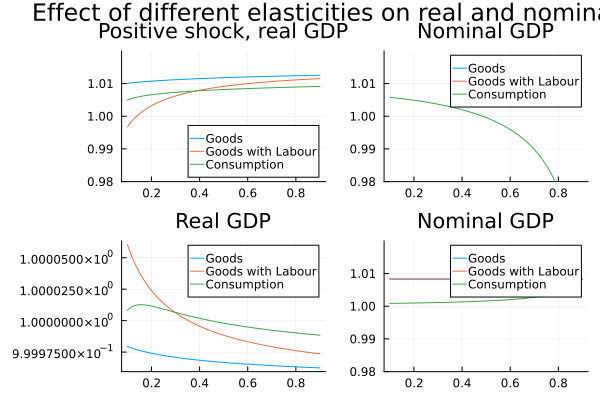

In [22]:
p1 = plot(first.(a),last.(a), label="Goods", title="Positive shock, real GDP",ylims=[0.98,1.02])
plot!(first.(b),last.(b), label ="Goods with Labour")
plot!(first.(c),last.(c), label = "Consumption")
p2 = plot(first.(d),last.(d), label="Goods", title="Nominal GDP",ylims=[0.98,1.02])
plot!(first.(e),last.(e), label ="Goods with Labour", ylims=[0.98,1.02])
plot!(first.(f),last.(f), label = "Consumption")
p3 = plot(first.(a1),last.(a1), label="Goods", title="Real GDP")
plot!(first.(b1),last.(b1), label ="Goods with Labour")
plot!(first.(c1),last.(c1), label = "Consumption")
p4 = plot(first.(d1),last.(d1), label="Goods", ylims=[0.98,1.02], title="Nominal GDP")
plot!(first.(e1),last.(e1), label ="Goods with Labour") 
plot!(first.(f1),last.(f1), label = "Consumption")
plot(p1,p2,p3,p4, legend = true, plot_title="Effect of different elasticities on real and nominal GDP")

## Effects of labour market slack

In [16]:
l(α, model) = (1 - α) * full_demand_labor_allocation(model) + α * model.data.labor_share


l (generic function with 1 method)

In [17]:
model = Model(data, shocks, CESELasticities(0.01, 0.5, 0.9))
sol = solve(model)
labour_slack_gradient = []
labour_slack_gradient_nominal = []
for α in range(0, 1, 100)
	labour_share(model) = l(α, model)
	sol = solve(model, labour_share, init = vcat(sol.prices, sol.quantities))
	push!(labour_slack_gradient, sol |> real_gdp)
	push!(labour_slack_gradient_nominal, sol |> nominal_gdp)
end


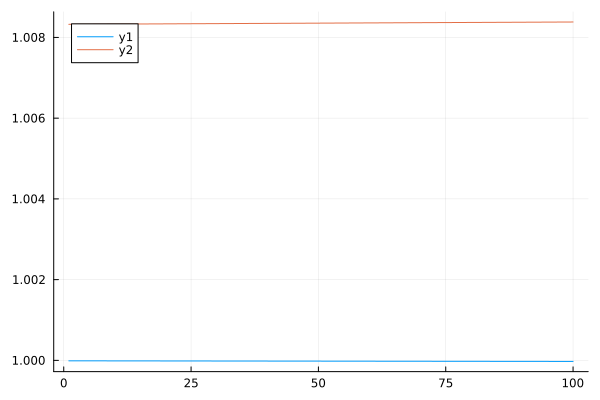

In [18]:
plot(labour_slack_gradient)
plot!(labour_slack_gradient_nominal)

100-element Vector{Any}:
 (0.9, 0.94236264865166)
 (0.8919191919191919, 0.9423588589229357)
 (0.8838383838383839, 0.9423550225908941)
 (0.8757575757575757, 0.9423511387174726)
 (0.8676767676767677, 0.9423472063378524)
 (0.8595959595959596, 0.9423432244594783)
 (0.8515151515151516, 0.9423391920610025)
 (0.8434343434343434, 0.9423351080911995)
 (0.8353535353535354, 0.9423309714678136)
 (0.8272727272727273, 0.9423267810763813)
 ⋮
 (0.16464646464646465, 0.9414986656915038)
 (0.15656565656565657, 0.9414713458476859)
 (0.1484848484848485, 0.9414427115000606)
 (0.1404040404040404, 0.9414126493561066)
 (0.13232323232323231, 0.9413810312251129)
 (0.12424242424242424, 0.9413477111625854)
 (0.11616161616161616, 0.9413125218207686)
 (0.10808080808080808, 0.9412752696969224)
 (0.1, 0.9412357288199251)

In [33]:
real_gdp(sol3)

0.9999999999999998

In [34]:
nominal_gdp(sol3)

0.9999999999999998